In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [160]:
def h(X, w):
    return np.dot(X, w)

# Створіть функцію для обчислення функції втрат у векторному вигляді

In [161]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(hypothesis(X, w) - y).sum() / (2*m)

# Реалізуйте один крок градієнтного спуску

In [162]:
def gradient(X, y, w):
    m = X.shape[0]
    res = h(X, w) - y
    return np.dot(X.T, res) / m

In [148]:
def gradient_step(X, y, w, learning_rate = 0.01):
    return w - learning_rate * gradient(X, y, w)

In [351]:
def gradient_descent(X, y, w, num_iter=1000, learning_rate = 0.01):
    loss = loss_function(X, y, w)
    loss_history = [loss]
    min_loss = float('inf')
    w_best = None
    for i in range(num_iter):
        w = gradient_step(X, y, w, learning_rate)
        loss = loss_function(X, y, w)
        loss_history.append(loss)
        
        if loss < min_loss:
            min_loss = loss
            w_best = w

    return w, w_best, min_loss, loss_history

# Знайдіть найкращі параметри w  для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [318]:
data = pd.read_csv('Housing.csv')

In [319]:
y = data['price'].values
X = data[['area', 'bathrooms', 'bedrooms']].values

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
X = np.hstack((np.ones((X.shape[0], 1)) , X))
y = y.reshape((y.shape[0], 1))

n = X.shape[1]
w = np.linspace(0, 0, n).reshape((n, 1))

The best values w:  [-0.43274166  0.67516563  0.33068178  0.33113861]
The best value of loss function:  0.35630279651195323


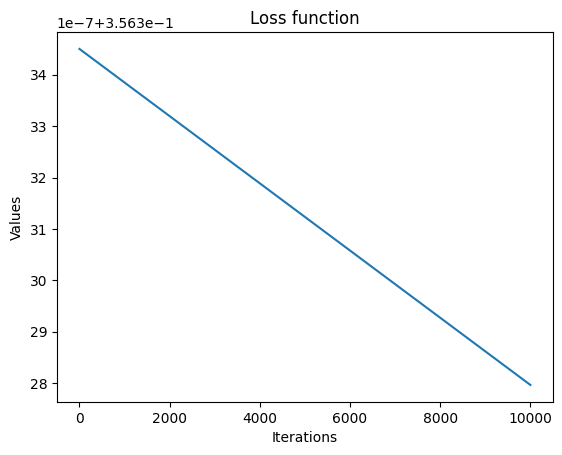

In [365]:
w, w_best, min_loss, loss_history = gradient_descent(X, y, w, 10000, 0.01)
print('The best values w: ', w_best.flatten())
print('The best value of loss function: ', min_loss)

plt.plot(loss_history)
plt.title('Loss function')
plt.ylabel('Values')
plt.xlabel('Iterations')
plt.show()

# Знайдіть ці ж параметри за допомогою аналітичного рішення

In [366]:
analitic_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
analitic_loss = loss_function(X, y, analitic_w)
print('Analitic w: ', analitic_w.flatten())
print('Analitic loss function: ', analitic_loss)

Analitic w:  [1.64622306e+03 5.53491384e-01 2.02545394e+03 5.94491876e+02]
Analitic loss function:  0.25645846664706085


# Порівняйте отримані результати

In [367]:
print('Learning value loss_function: ', min_loss)
print('Analitic value loss_function: ', analitic_loss)


Learning value loss_function:  0.35630279651195323
Analitic value loss_function:  0.25645846664706085
